In [617]:
import pandas as pd
from mlchartist.features import transform_file
from mlchartist.array_builder import generate_test_window

### Build a refference dataframe with daily returns for Nasdaq 100 index for the last 2 years

In [843]:
ndx_df = transform_file('../../raw_data/^ndx.txt')[['date', 'ticker', '1D_past_return']]

/home/kensei/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/home/kensei/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


In [839]:
DB_LAST_DATE = '2020-12-23' # Last date in companies csvs

In [844]:
ndx_df = ndx_df[ndx_df['date'] <= DB_LAST_DATE].sort_values(by="date",ascending=True).set_index("date").last('2Y').rename(columns={'1D_past_return': 'NDX'}).drop(columns=['ticker'])

In [846]:
ndx_df # reference dataframe with all days with Nasdaq 100 index 1D returns for the last 2 years

,NDX
date,
2019-01-02,0.004883
2019-01-03,-0.033602
2019-01-04,0.044824
2019-01-07,0.010211
2019-01-08,0.009802
...,...
2020-12-17,0.006623
2020-12-18,-0.001088
2020-12-21,-0.003762


### Build a dataframe with 1D returns for all days for the last 2 years for all companies of Nasdaq 100

In [847]:
nasdaq100 = pd.read_csv('../../raw_data/nasdaq100.csv', header=None)

In [848]:
nasdaq100_list = list(nasdaq100.values.flatten())

In [852]:
nasdaq_100_returns = ndx_df.copy()

In [853]:
for ticker in nasdaq100_list:
    ticker_path = '../../raw_data/processed/' + ticker.strip().lower() + '.csv'
    ticker_df = pd.read_csv(ticker_path)[['date', '1D_past_return']].set_index('date').rename(columns={'1D_past_return': ticker})
    nasdaq_100_returns = nasdaq_100_returns.merge(ticker_df, how='left', left_index=True, right_index=True)

In [854]:
nasdaq_100_returns

,NDX,ATVI,ADBE,AMD,ALGN,ALXN,AMZN,AMGN,AAL,ADI,...,UAL,VRSN,VRSK,VRTX,WBA,WDC,WDAY,WYNN,XEL,XLNX
date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,0.004883,0.009870,-0.007382,0.020043,-0.034904,0.007087,0.024741,-0.014197,0.011551,0.001056,...,0.005374,-0.003574,-0.003532,-0.009836,-0.004240,0.034884,0.000376,0.055613,-0.021296,0.019739
2019-01-03,-0.033602,-0.035491,-0.039498,-0.094530,-0.085791,0.022030,-0.025242,-0.015174,-0.074521,-0.060410,...,-0.049656,-0.034989,-0.030498,-0.002133,-0.010432,-0.068214,-0.035808,-0.009904,-0.003915,-0.037660
2019-01-04,0.044824,0.039884,0.048632,0.114370,0.010445,0.057779,0.050064,0.034121,0.065817,0.024283,...,0.033500,0.044744,0.044060,0.054785,0.033227,0.042353,0.060577,0.040426,0.009770,0.046302
2019-01-07,0.010211,0.028222,0.013573,0.082632,0.017192,0.018302,0.034353,0.013491,0.028418,0.006273,...,0.006652,0.016312,0.001014,0.018240,0.005791,0.035556,0.000918,0.017816,-0.004327,0.026429
2019-01-08,0.009802,0.030293,0.014918,0.008751,0.015954,0.006207,0.016612,0.012777,-0.016068,0.024398,...,-0.010213,0.036460,0.008837,0.013307,0.019982,-0.009638,0.021101,0.031393,0.011574,-0.019062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-17,0.006623,0.002720,0.011145,-0.000103,0.020103,-0.000633,-0.001506,0.012257,-0.003559,0.006863,...,-0.002609,0.011370,0.027364,0.020723,0.010880,0.008299,0.039984,-0.003645,0.021639,0.000725
2020-12-18,-0.001088,0.021592,0.015322,-0.009500,0.006075,-0.007472,-0.010639,-0.011892,-0.017262,0.005425,...,-0.024847,-0.000505,0.016050,-0.000844,-0.004648,-0.005051,0.006589,0.009755,-0.013580,-0.017582
2020-12-21,-0.003762,-0.017262,-0.009067,-0.028044,0.001491,-0.012249,0.001415,-0.005164,-0.024833,-0.013628,...,-0.015311,-0.013451,-0.008314,-0.009167,-0.000492,-0.018425,0.003853,-0.029242,-0.010736,-0.026208


In [855]:
nasdaq_100_returns.fillna(value=0.0, inplace=True)

In [856]:
nasdaq_100_returns.to_csv('../../raw_data/backtest.csv')

In [860]:
nasdaq_100_returns.iloc[-10::-10].index # generate indices for backtest windows

DatetimeIndex(['2020-12-10', '2020-11-25', '2020-11-11', '2020-10-28',
               '2020-10-14', '2020-09-30', '2020-09-16', '2020-09-01',
               '2020-08-18', '2020-08-04', '2020-07-21', '2020-07-07',
               '2020-06-22', '2020-06-08', '2020-05-22', '2020-05-08',
               '2020-04-24', '2020-04-09', '2020-03-26', '2020-03-12',
               '2020-02-27', '2020-02-12', '2020-01-29', '2020-01-14',
               '2019-12-30', '2019-12-13', '2019-11-29', '2019-11-14',
               '2019-10-31', '2019-10-17', '2019-10-03', '2019-09-19',
               '2019-09-05', '2019-08-21', '2019-08-07', '2019-07-24',
               '2019-07-10', '2019-06-25', '2019-06-11', '2019-05-28',
               '2019-05-13', '2019-04-29', '2019-04-12', '2019-03-29',
               '2019-03-15', '2019-03-01', '2019-02-14', '2019-01-31',
               '2019-01-16', '2019-01-02'],
              dtype='datetime64[ns]', name='date', freq=None)

In [861]:
dates_to_predict = nasdaq_100_returns.iloc[-10::-10].index

### Build a dataframe with predictions for all companies for provided backtest windows

In [594]:
from tensorflow.keras import models

In [595]:
model = models.load_model('../../models/Nasdaq_100_150k/')

In [599]:
import joblib

In [600]:
scaler = joblib.load('../../models/scaler')

In [623]:
joined_df = pd.DataFrame()

# Takes nrows from history from each company from the sample
nrows = 530

for ticker in nasdaq100_list:
    ticker_path = '../../raw_data/processed/' + ticker.strip().lower() + '.csv'
    ticker_df = pd.read_csv(ticker_path, nrows=nrows)
    joined_df = joined_df.append(ticker_df)

In [624]:
joined_df['date'] = pd.to_datetime(joined_df['date'])

FIVE_TR = 0.0006
TEN_TR = 0.0012
TWENTY_TR = 0.0024

joined_df['5D_return_bin'] = (joined_df['5TD_return'] >= FIVE_TR)
joined_df['10D_return_bin'] = (joined_df['10TD_return'] >= TEN_TR)
joined_df['20D_return_bin'] = (joined_df['20TD_return'] >= TWENTY_TR)

INPUT_COLS = ['RSI', 'Stochastic', 'Stochastic_signal', 'ATR', 'ADX', 'ADX_pos', 'ADX_neg', 'MACD', 'MACD_diff','MACD_signal', '1D_past_return', '5D_past_return', '10D_past_return']
TARGET_COLS = ['10D_return_bin']



In [625]:
joined_df

,ticker,date,RSI,Stochastic,Stochastic_signal,ADI,OBV,ATR,ADX,ADX_pos,...,MACD_signal,5TD_return,10TD_return,20TD_return,1D_past_return,5D_past_return,10D_past_return,5D_return_bin,10D_return_bin,20D_return_bin
0,ATVI,2020-12-23,72.968716,95.306711,89.359528,6.592898e+08,2083839504,2.000549,31.278151,34.437622,...,2.341171,0.029265,0.012083,0.035362,0.008835,0.022557,0.092395,True,True,True
1,ATVI,2020-12-22,71.480257,88.879804,89.806487,6.561280e+08,2079110882,2.024437,29.961930,33.305287,...,2.171161,0.024156,0.002796,0.056028,0.006869,0.028762,0.069234,True,True,True
2,ATVI,2020-12-21,70.307987,83.892069,90.949116,6.525176e+08,2074025254,2.079394,28.832721,34.919291,...,1.982168,0.028826,-0.009121,0.065195,-0.017262,0.033395,0.079494,True,False,True
3,ATVI,2020-12-18,77.913043,96.647588,96.117796,6.515251e+08,2081329247,1.993963,27.616649,39.216591,...,1.766482,0.011730,0.003541,0.052562,0.021592,0.079947,0.117334,True,True,True
4,ATVI,2020-12-17,74.816006,92.307692,97.117377,6.420850e+08,2067253910,1.955806,25.353070,37.432920,...,1.517926,0.028261,0.016279,0.053018,0.002720,0.064373,0.122731,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,XLNX,2018-11-21,56.342365,47.765492,46.275820,9.077422e+08,1012868326,3.237039,20.056203,25.119468,...,2.195945,0.054332,0.008427,-0.057677,0.021507,0.032352,0.020676,True,True,False
526,XLNX,2018-11-20,53.396040,27.390002,62.048418,9.067132e+08,1010126047,3.307888,20.736159,24.909636,...,2.186354,0.076887,0.051160,-0.014140,-0.036885,0.013393,-0.010336,True,True,False
527,XLNX,2018-11-19,60.102809,63.671965,86.168467,9.074107e+08,1014513350,3.228264,21.700216,27.487409,...,2.153328,0.011019,0.038325,-0.030726,-0.028916,0.067900,0.046555,True,True,False
528,XLNX,2018-11-16,66.350185,95.083286,86.282574,9.112860e+08,1019672902,3.254746,20.815260,29.360974,...,2.048599,-0.016886,0.045199,-0.014452,0.022914,0.057210,0.068734,False,True,False


In [629]:
result_df = pd.DataFrame(index=dates_to_predict, columns=joined_df['ticker'].unique())

In [823]:
comp_count = 0
for cmp in result_df.columns:
    single_comp = joined_df[joined_df['ticker'] == cmp]
    for dt in dates_to_predict:
        test_x, test_y = generate_test_window(test_df=single_comp,
                        date= dt,
                        fitted_scaler=scaler,
                        time_window=30,
                        input_cols=INPUT_COLS,
                        target_col=TARGET_COLS)
        prediction = model.predict(test_x)[0]
        if prediction > .5:
            result_df.loc[dt, cmp] = prediction[0]
        else:
            result_df.loc[dt, cmp] = 0
    comp_count +=1
    print(f'Saved all dates predictions for {cmp} --> {comp_count} out of {len(result_df.columns)}')

Saved all dates predictions for ATVI --> 1 out of 100
Saved all dates predictions for ADBE --> 2 out of 100
Saved all dates predictions for AMD --> 3 out of 100
Saved all dates predictions for ALGN --> 4 out of 100
Saved all dates predictions for ALXN --> 5 out of 100
Saved all dates predictions for AMZN --> 6 out of 100
Saved all dates predictions for AMGN --> 7 out of 100
Saved all dates predictions for AAL --> 8 out of 100
Saved all dates predictions for ADI --> 9 out of 100
Saved all dates predictions for AAPL --> 10 out of 100
Saved all dates predictions for AMAT --> 11 out of 100
Saved all dates predictions for ASML --> 12 out of 100
Saved all dates predictions for ADSK --> 13 out of 100
Saved all dates predictions for ADP --> 14 out of 100
Saved all dates predictions for AVGO --> 15 out of 100
Saved all dates predictions for BID --> 16 out of 100
Saved all dates predictions for BIIB --> 17 out of 100
Saved all dates predictions for BMRN --> 18 out of 100
Saved all dates predicti

In [824]:
result_transposed = result_df.T

In [862]:
result_transposed # a dataframe with all probabilities (higher than .5) of positive returns for all widows, when probability lower than .5 --> 0

date,2020-12-10,2020-11-25,2020-11-11,2020-10-28,2020-10-14,2020-09-30,2020-09-16,2020-09-01,2020-08-18,2020-08-04,...,2019-05-13,2019-04-29,2019-04-12,2019-03-29,2019-03-15,2019-03-01,2019-02-14,2019-01-31,2019-01-16,2019-01-02
ATVI,0.982226,0,0,0,0,0,0,0,0.822521,0,...,0,0,0.620858,0,0,0.987177,0,0,0,0.827965
ADBE,0.972048,0.683873,0.857772,0.763106,0,0.903799,0.735558,0,0.956306,0.947959,...,0,0,0.969717,0.971195,0.961746,0,0.708868,0.989298,0.990066,0.675605
AMD,0.784893,0,0.783418,0.959059,0,0.774432,0,0,0.767183,0,...,0.979015,0,0.640624,0.988641,0.808075,0,0.6667,0,0.795773,0.983994
ALGN,0,0.960299,0,0.805619,0.947667,0.815205,0,0,0,0.775947,...,0,0,0.905497,0.901826,0.744334,0,0,0.968039,0.698903,0.948789
ALXN,0.991846,0,0,0.98016,0,0.982378,0,0,0.979378,0,...,0,0,0,0.959389,0,0,0.92626,0.986424,0.991959,0.658606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WDC,0,0.952938,0.8137,0.983571,0.628442,0.661,0,0.640066,0.944403,0,...,0,0,0.724365,0.796738,0.960379,0,0.947445,0.984663,0.992568,0.588195
WDAY,0.600827,0,0,0.819344,0,0.969076,0.974639,0,0.530169,0.978949,...,0.986907,0,0.94095,0,0.836433,0,0,0.944405,0.745812,0.843062
WYNN,0.979535,0.987387,0.940616,0.991787,0.993857,0,0,0,0.640175,0.977685,...,0,0,0.828286,0.81277,0.980557,0,0.710011,0,0.980558,0.956749
XEL,0.70873,0,0,0.963948,0,0.918184,0,0.939588,0,0,...,0,0.992424,0,0,0,0.992629,0.749809,0.639203,0.768101,0.990702


In [866]:
def built_comp_list(result_transposed, n=1):
    cmp_dict = {}
    for dt in result_transposed.columns:
        dt_serie = result_transposed[dt].sort_values(ascending=False)
        dt_serie_non_zero = dt_serie[dt_serie != 0]
        comp_list = list(dt_serie_non_zero.head(n).index)
        cmp_dict[dt.strftime('%Y-%m-%d')] = comp_list
    return cmp_dict
    

In [733]:
import numpy as np

In [734]:
def bckt_time_window(dt, bck_test_df, comp_list):
    comp_series = {}
    for comp in bck_test_df.columns:
        if comp in comp_list:
            comp_series[comp] = bck_test_df[comp][dt:].head(10).sort_index(ascending=False)
        else:
            comp_series[comp] = pd.Series(index=bck_test_df[dt:].head(10).index, data = np.nan)
    return pd.DataFrame(comp_series)

In [893]:
N = 4

In [894]:
top_n = built_comp_list(result_transposed, n=N)

In [895]:
top_n

{'2020-12-10': ['BMRN', 'ALXN', 'HA', 'CDN'],
 '2020-11-25': ['PEP', 'TXN', 'CHKP', 'SBUX'],
 '2020-11-11': ['FAST', 'VRTX', 'NXPI', 'LBTYA'],
 '2020-10-28': ['SBUX', 'FISV', 'WYNN', 'ADI'],
 '2020-10-14': ['WYNN', 'IDXX', 'HSIC', 'ALGN'],
 '2020-09-30': ['CTSH', 'AMAT', 'XLNX', 'MYL'],
 '2020-09-16': ['VRTX', 'CTX', 'EBAY', 'XLNX'],
 '2020-09-01': ['CSX', 'AAL', 'XEL', 'AVGO'],
 '2020-08-18': ['NTAP', 'PEP', 'AVGO', 'NLOK'],
 '2020-08-04': ['DLTR', 'EXPE', 'QCOM', 'CSX'],
 '2020-07-21': ['TM', 'FAST', 'FB', 'VRSK'],
 '2020-07-07': ['CSX', 'CTSH', 'NXPI', 'EXPE'],
 '2020-06-22': ['COST', 'CTSH', 'PEP', 'AAL'],
 '2020-06-08': ['BID', 'CDN', 'INCY', 'EA'],
 '2020-05-22': ['JD', 'CHKP', 'MCHP', 'JBHT'],
 '2020-05-08': ['AAL', 'MXIM', 'JBHT', 'BID'],
 '2020-04-24': ['AAL', 'LBTYK', 'QCOM', 'VRSK'],
 '2020-04-09': ['QCOM', 'FAST', 'EA', 'AMD'],
 '2020-03-26': ['KHC', 'TTWO', 'PEP', 'PCAR'],
 '2020-03-12': ['ALXN', 'M', 'SWK', 'ATVI'],
 '2020-02-27': ['TTWO', 'GILD', 'CTX', 'JD'],
 '2020-02-

In [896]:
window_list = []
for dt, comp_list in top_n.items():
    window_list.append(bckt_time_window(dt, nasdaq_100_returns, comp_list))

In [897]:
avg_ret = pd.DataFrame(pd.concat(window_list).mean(axis = 1).sort_index(), columns=['avg_return'])

In [898]:
returns = avg_ret.merge(bck_test_df['NDX'], left_index=True, right_index=True, how='inner') +1

In [899]:
print(returns.tail(200))

            avg_return       NDX
date                            
2020-03-12    0.917669  0.907263
2020-03-13    1.065361  1.100722
2020-03-16    0.916482  0.878067
2020-03-17    1.077221  1.064608
2020-03-18    0.995778  0.960025
...                ...       ...
2020-12-17    1.004836  1.006623
2020-12-18    0.988781  0.998912
2020-12-21    0.986335  0.996238
2020-12-22    1.001506  1.002151
2020-12-23    0.997864  0.994935

[200 rows x 2 columns]


In [900]:
final_ret = returns.fillna(value=1)

<AxesSubplot:xlabel='date'>

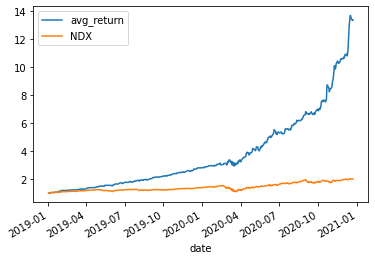

In [901]:
final_ret.cumprod().plot()